In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/kaggle_survey_2021_responses.csv", low_memory= False)


In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(25974, 369)

In [5]:
question = df.iloc[0,:]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [6]:
df.drop(index=0 , inplace= True)

In [7]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [9]:
for col in df.columns:
    if df[col].str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(30), int64(1), object(338)
memory usage: 73.1+ MB


In [11]:
df['Q3'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [12]:
countries_str = 'Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen.'
# arab_countries = countries_str.split(",")

In [13]:
df['Q3_clean'] = df['Q3'].str.strip()
arab_countries_clean = [country.strip() for country in countries_str.split(",")]

arabic_df = df[df['Q3_clean'].isin(arab_countries_clean)]

In [14]:
arab_countries_clean

['Algeria',
 'Bahrain',
 'Comoros',
 'Djibouti',
 'Egypt',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Mauritania',
 'Morocco',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Somalia',
 'Sudan',
 'Syria',
 'Tunisia',
 'United Arab Emirates',
 'Yemen.']

In [47]:
arabic_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q3_clean
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN,Egypt
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [15]:
arabic_df.shape

(1018, 370)

In [16]:
arabic_df['Q3'].unique()

array(['Egypt', 'Algeria', 'Tunisia', 'Saudi Arabia', 'Morocco',
       'United Arab Emirates', 'Iraq'], dtype=object)

#### Line Plot For Age Distribution

In [17]:
age_by_groupe = arabic_df['Q1'].value_counts().sort_index()
age_by_groupe

Q1
18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: count, dtype: int64

In [18]:
X = age_by_groupe.index
X

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69'],
      dtype='object', name='Q1')

In [19]:
Y = age_by_groupe.values
Y

array([179, 250, 190, 130, 109,  74,  45,  23,   8,  10], dtype=int64)

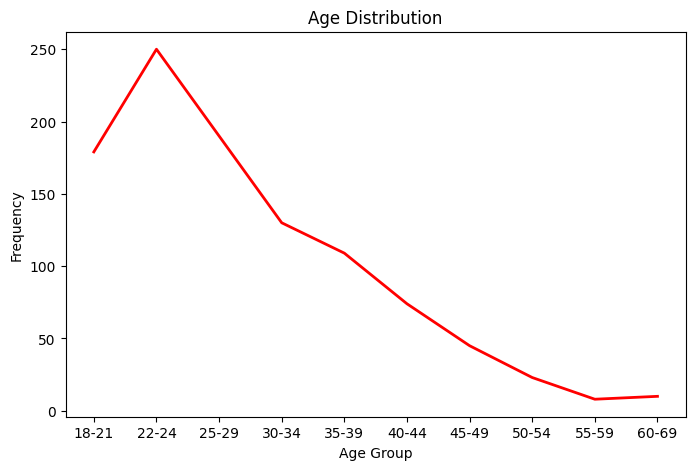

In [53]:
plt.figure(figsize=(8,5))

plt.plot(X, Y , color='red', linewidth=2 )
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

#### Kaggle Users By Arab Country Distribution

In [20]:
Countries_by_groupe = arabic_df['Q3'].value_counts()
Countries_by_groupe

Q3
Egypt                   482
Morocco                 140
United Arab Emirates    111
Tunisia                 109
Saudi Arabia             89
Algeria                  44
Iraq                     43
Name: count, dtype: int64

In [21]:
X1 = Countries_by_groupe.index
X1

Index(['Egypt', 'Morocco', 'United Arab Emirates', 'Tunisia', 'Saudi Arabia',
       'Algeria', 'Iraq'],
      dtype='object', name='Q3')

In [22]:
Y1 = Countries_by_groupe.values
Y1

array([482, 140, 111, 109,  89,  44,  43], dtype=int64)

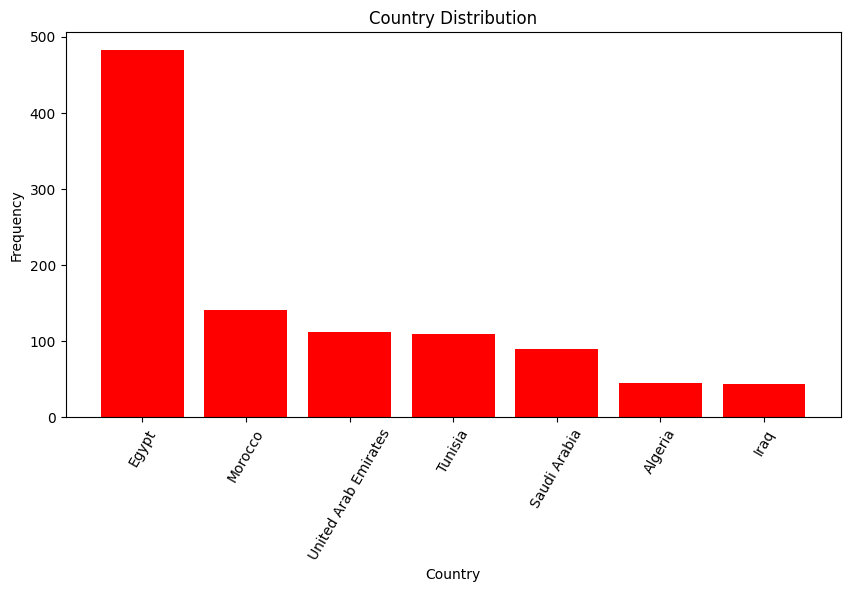

In [23]:
plt.figure(figsize=(10,5))
plt.bar(X1,Y1, color='red')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

#### Arab Kaggle Users by Programming Language Distribution Pie Chart

In [24]:
Q7_columns = df.columns[df.columns.str.contains('^Q7')]
Q7_columns

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [25]:
lang_user = arabic_df[Q7_columns]
lang_user

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dict_Q7 = dict()

for col in Q7_columns:
    if not arabic_df[col].dropna().empty:
        value_counts = arabic_df[col].value_counts()
        if not value_counts.empty:
            key = value_counts.index[0]
            dict_Q7[key] = value_counts.iloc[0] 


In [27]:
dict_Q7

{'Python': 838,
 'R': 151,
 'SQL': 449,
 'C': 241,
 'C++': 293,
 'Java': 277,
 'Javascript': 212,
 'Julia': 5,
 'Swift': 14,
 'Bash': 54,
 'MATLAB': 183,
 'Other': 98}

In [28]:
q7_series = pd.Series(dict_Q7)
q7_series

Python        838
R             151
SQL           449
C             241
C++           293
Java          277
Javascript    212
Julia           5
Swift          14
Bash           54
MATLAB        183
Other          98
dtype: int64

In [29]:
color = [
    "#FF6347",  # Tomato
    "#32CD32",  # Lime Green
    "#1E90FF",  # Dodger Blue
    "#FFD700",  # Gold
    "#8A2BE2",  # Blue Violet
    "#DC143C",  # Crimson
    "#00FA9A",  # Medium Spring Green
    "#FF1493",  # Deep Pink
    "#7FFF00",  # Chartreuse
    "#FF4500",  # Orange Red
    "#2F4F4F",  # Dark Slate Gray
    "#D2691E"   # Chocolate
]


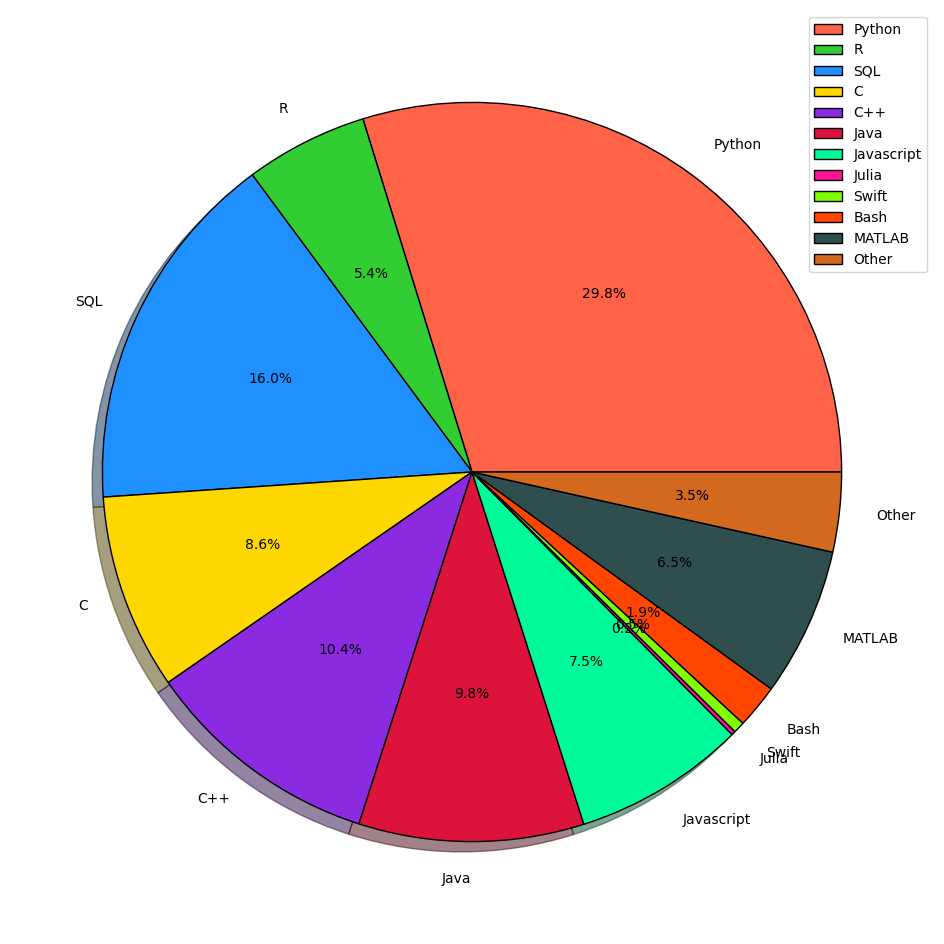

In [30]:
plt.figure(figsize=(13,12))
plt.pie( q7_series, colors = color , autopct='%1.1f%%', labels=q7_series.index, shadow= True, wedgeprops={'edgecolor':'black'}  )
plt.legend(q7_series.index)
plt.show()